In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import cv2
from keras.models import model_from_json
import numpy as np

In [2]:
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [5]:
import os

In [12]:
train_generator = train_data_gen.flow_from_directory(
                          r'C:\Users\HOme\Downloads\ds\train',
                          target_size = (48,48),
                          batch_size = 64,
                          color_mode = 'grayscale',
                          class_mode = 'categorical')

Found 28709 images belonging to 7 classes.


In [13]:
validation_generator = validation_data_gen.flow_from_directory(
        r'C:\Users\HOme\Downloads\ds\test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [14]:
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                         input_shape=(48, 48, 1)))

emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
 
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
 
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))
 
emotion_model.summary()
 
cv2.ocl.setUseOpenCL(False)
 
initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=100000, 
                               decay_rate=0.96)
 
optimizer = Adam(learning_rate=lr_schedule)
 
emotion_model.compile(loss='categorical_crossentropy', optimizer=optimizer, 
                      metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                 

In [15]:
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

C:\Users\HOme\AppData\Local\Temp\ipykernel_8668\182995105.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(


Epoch 1/30


448/448 [==============================] - 222s 492ms/step - loss: 1.7849 - accuracy: 0.2703 - val_loss: 1.6553 - val_accuracy: 0.3686
Epoch 2/30
448/448 [==============================] - 72s 160ms/step - loss: 1.5927 - accuracy: 0.3809 - val_loss: 1.5231 - val_accuracy: 0.4104
Epoch 3/30
448/448 [==============================] - 70s 157ms/step - loss: 1.4922 - accuracy: 0.4276 - val_loss: 1.4274 - val_accuracy: 0.4618
Epoch 4/30
448/448 [==============================] - 73s 164ms/step - loss: 1.4162 - accuracy: 0.4595 - val_loss: 1.3706 - val_accuracy: 0.4777
Epoch 5/30
448/448 [==============================] - 70s 157ms/step - loss: 1.3633 - accuracy: 0.4849 - val_loss: 1.3142 - val_accuracy: 0.5000
Epoch 6/30
448/448 [==============================] - 70s 157ms/step - loss: 1.3099 - accuracy: 0.5032 - val_loss: 1.2734 - val_accuracy: 0.5140
Epoch 7/30
448/448 [==============================] - 71s 159ms/step - loss: 1.2682 - accuracy: 0.5241 - val_loss: 1.2477 - val

In [16]:
emotion_model.evaluate(validation_generator)

113/113 [==============================] - 4s 38ms/step - loss: 1.0786 - accuracy: 0.6124


[1.0785682201385498, 0.6124268770217896]

In [17]:
accuracy = emotion_model_info.history['accuracy']
val_accuracy = emotion_model_info.history['val_accuracy']
loss = emotion_model_info.history['loss']
val_loss = emotion_model_info.history['val_loss']

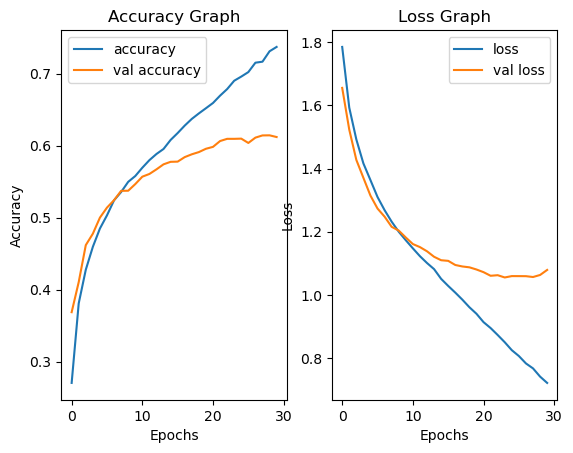

In [18]:
import matplotlib.pyplot as plt
 
# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label='val accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
 
# loss graph
plt.subplot(1, 2, 2)
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
 
plt.show()

In [20]:
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)
 
# save trained model weight in .h5 file
emotion_model.save_weights('emotion_model.h5')

In [21]:
json_file = open('emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

In [25]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, (1280, 720))
    if not ret:
        print(ret)
    
    face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
 
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)
 
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)
 
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
 
    cv2.imshow('Emotion Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
 
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 